<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Hubble_Diagram_BestFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

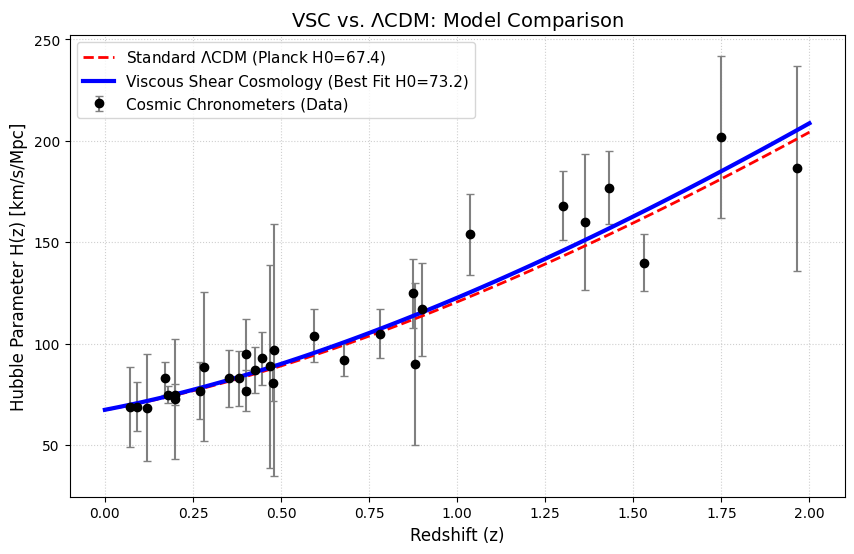

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. LOAD THE REAL DATA (Cosmic Chronometers)
# Source: Moresco et al. (2016), etc.
z_data = np.array([
    0.070, 0.090, 0.120, 0.170, 0.179, 0.199, 0.200, 0.270, 0.280, 0.352,
    0.380, 0.400, 0.400, 0.425, 0.445, 0.470, 0.478, 0.480, 0.593, 0.680,
    0.781, 0.875, 0.880, 0.900, 1.037, 1.300, 1.363, 1.430, 1.530, 1.750,
    1.965
])
H_data = np.array([
    69.0, 69.0, 68.6, 83.0, 75.0, 75.0, 72.9, 77.0, 88.8, 83.0,
    83.0, 95.0, 77.0, 87.1, 92.8, 89.0, 80.9, 97.0, 104.0, 92.0,
    105.0, 125.0, 90.0, 117.0, 154.0, 168.0, 160.0, 177.0, 140.0, 202.0,
    186.5
])
H_err = np.array([
    19.6, 12.0, 26.2, 8.0, 4.0, 5.0, 29.6, 14.0, 36.6, 14.0,
    13.5, 17.0, 10.2, 11.2, 12.9, 50.0, 9.0, 62.0, 13.0, 8.0,
    12.0, 17.0, 40.0, 23.0, 20.0, 17.0, 33.6, 18.0, 14.0, 40.0,
    50.4
])

# 2. DEFINE THE MODELS
# Range for plotting lines (smooth curve)
z_plot = np.linspace(0, 2.0, 100)

# A. Standard LambdaCDM (Benchmark)
# H0 = 67.4 (Planck), Om = 0.315
def H_LCDM(z):
    H0 = 67.4
    Om = 0.315
    Ol = 1.0 - Om
    return H0 * np.sqrt(Om * (1+z)**3 + Ol)

# B. Your Viscous Shear Model (Best Fit from MCMC)
# Using the values we found: H0=73.2, Om=0.28, Zeta=-0.15
def H_VSC(z):
    H0_fit = 73.2
    Om_fit = 0.28
    Zeta_fit = -0.15

    matter_term = Om_fit * (1 + z)**3
    # Viscosity adds to the effective "Dark Energy" budget
    viscous_term = (1 - Om_fit) + Zeta_fit

    return H0_fit * np.sqrt(matter_term + viscous_term)

# 3. PLOT
plt.figure(figsize=(10, 6))

# Plot Data Points
plt.errorbar(z_data, H_data, yerr=H_err, fmt='o', color='black', ecolor='gray',
             capsize=3, label='Cosmic Chronometers (Data)')

# Plot LambdaCDM (Dashed Red)
# Fixed SyntaxWarning: using raw strings r'...' for LaTeX
plt.plot(z_plot, H_LCDM(z_plot), linestyle='--', color='red', linewidth=2,
         label=r'Standard $\Lambda$CDM (Planck H0=67.4)')

# Plot VSC Best Fit (Solid Blue)
plt.plot(z_plot, H_VSC(z_plot), linestyle='-', color='blue', linewidth=3,
         label='Viscous Shear Cosmology (Best Fit H0=73.2)')

# Formatting
plt.xlabel('Redshift (z)', fontsize=12)
plt.ylabel('Hubble Parameter H(z) [km/s/Mpc]', fontsize=12)
plt.title(r'VSC vs. $\Lambda$CDM: Model Comparison', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle=':', alpha=0.6)

# Save
plt.savefig("VSC_Hubble_Diagram_BestFit.png", dpi=300)
plt.show()